In [72]:
# Libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib. pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
# Load the dataset
df = pd.read_csv("./apartments_for_rent_classified_10K.csv", sep=";", encoding='cp1252')
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


# 1. Data Exploration

<h3>1.1 Describe Dataset

In [3]:
# Describe the dataset
print("Description of the dataset:")
print(df.info())

Description of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non

<h3> 1.2 Convert it into a table

In [5]:
# Get the columns and their data types
column_dtype_table = pd.DataFrame({
    'Column': df.columns,
    'Dtype': df.dtypes
})

# Display the table
column_dtype_table

,Column,Dtype
id,id,int64
category,category,object
title,title,object
body,body,object
amenities,amenities,object
bathrooms,bathrooms,float64
bedrooms,bedrooms,float64
currency,currency,object
fee,fee,object
has_photo,has_photo,object


<h1> 2.0 PREPROCESSING

<h3> 2.1 Check for duplicates

In [6]:
# Check for duplicates
duplicates = df.duplicated()
print("Are there any duplicate rows?")
print(duplicates.any())

Are there any duplicate rows?
False


<h3> 2.2 Check for missing data

In [7]:
# Check for missing data
missing_data = df.isnull().sum()
print("Missing data in each column:")
print(missing_data)

Missing data in each column:
id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     4163
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64


<h3> 2.3 Drop rows with missing values

In [8]:
# Select key numerical columns
numerical_cols = ['bathrooms', 'bedrooms', 'latitude', 'longitude']

# Drop rows with missing values in key numerical columns
df_cleaned = df.dropna(subset=numerical_cols)

# Display the cleaned dataset to ensure the cleaning worked
print(df_cleaned.head())


            id                category  \
2   5668626833  housing/rent/apartment   
3   5659918074  housing/rent/apartment   
5   5667891676  housing/rent/apartment   
8   5668610290  housing/rent/apartment   
14  5664571820  housing/rent/apartment   

                                                title  \
2   Studio apartment N Scott St, 14th St N, Arling...   
3                      Studio apartment 1717 12th Ave   
5                           0 BR in New York NY 10019   
8                        Studio apartment 333 Hyde St   
14                  Studio apartment 57 Taylor Street   

                                                 body  \
2   This unit is located at N Scott St, 14th St N,...   
3   This unit is located at 1717 12th Ave, Seattle...   
5   **RARE GEM WITH PRIVATE OUTDOOR TERRACE****AVA...   
8   This unit is located at 333 Hyde St, San Franc...   
14  This unit is located at 57 Taylor Street, San ...   

                                      amenities  bathrooms  b

<h3>2.3 Removing outliers Using IQR Method(Interquartile Range)

In [73]:
# Function to remove outliers
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

numerical_cols = ['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 'square_feet']
df_clean = remove_outliers_iqr(df_cleaned, numerical_cols)

print(df_clean.describe())


                 id    bathrooms     bedrooms        price  square_feet  \
count  8.498000e+03  8498.000000  8498.000000  8498.000000  8498.000000   
mean   5.619504e+09     1.249294     1.534361  1262.898094   808.052718   
std    7.213294e+07     0.445000     0.695694   469.544892   273.002877   
min    5.508654e+09     1.000000     0.000000   200.000000   107.000000   
25%    5.509215e+09     1.000000     1.000000   904.000000   625.000000   
50%    5.668253e+09     1.000000     1.000000  1188.000000   766.000000   
75%    5.668625e+09     1.500000     2.000000  1525.000000   975.000000   
max    5.668643e+09     3.500000     3.000000  2727.000000  1572.000000   

          latitude    longitude          time      Cluster  
count  8498.000000  8498.000000  8.498000e+03  8498.000000  
mean     37.671246   -93.641614  1.574684e+09     0.830901  
std       5.335080    14.609547  3.865806e+06     0.883066  
min      25.380100  -123.328300  1.568744e+09     0.000000  
25%      33.517800 

<h3> 2.5 Five-number summary

In [25]:
# Get five-number summary 
summary_after_cleaning = df_clean[numerical_cols].describe().loc[['min', '25%', '50%', '75%', 'max']]

print("Five-number summary after cleaning:")
print(summary_after_cleaning)


Five-number summary after cleaning:
     bathrooms  bedrooms  latitude  longitude   price  square_feet
min        1.0       0.0   25.3801  -123.3283   200.0        107.0
25%        1.0       1.0   33.5178   -98.5253   904.0        625.0
50%        1.0       1.0   38.9118   -93.5101  1188.0        766.0
75%        1.5       2.0   41.4794   -81.8035  1525.0        975.0
max        3.5       3.0   48.7871   -70.1916  2727.0       1572.0


<h3> 2.6 Visualisations after Preprocessing

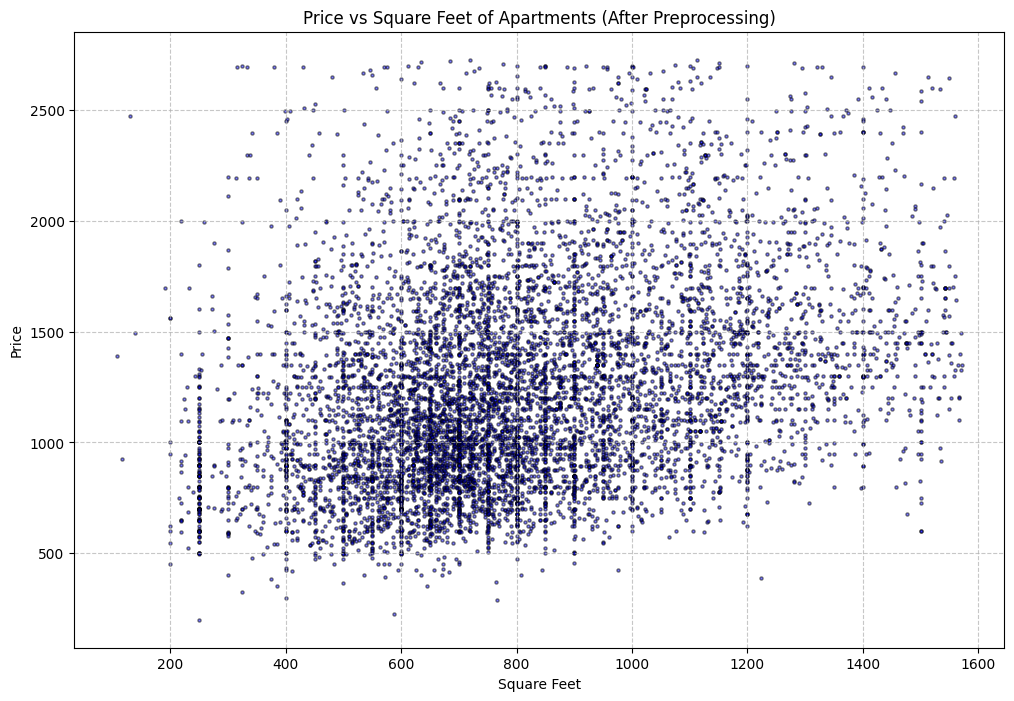

In [26]:
# Plotting the scatter plot of square_feet vs price
plt.figure(figsize=(12, 8))
plt.scatter(df_clean['square_feet'], df_clean['price'], alpha=0.5, color='blue', edgecolor='k', s=5)
plt.title('Price vs Square Feet of Apartments (After Preprocessing)')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<h1>3. K-means clustering

<h3> 3.1 Selecting relevant columns

In [64]:
features = ['price', 'bedrooms', 'bathrooms', 'square_feet', 'latitude', 'longitude']
df_clean = df_clean.dropna(subset=features)
feature_set = df_clean[features]

<h3> 3.2 Normalising the data

In [65]:
# Normalising the data
scaler = StandardScaler()
feature_set_scaled = scaler.fit_transform(feature_set)

<h3>3.3 Optimal Clusters with Elbow Method

In [66]:
# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(feature_set_scaled)
    sse.append(kmeans.inertia_)


<h3>3.4 Plot Elbow Curve

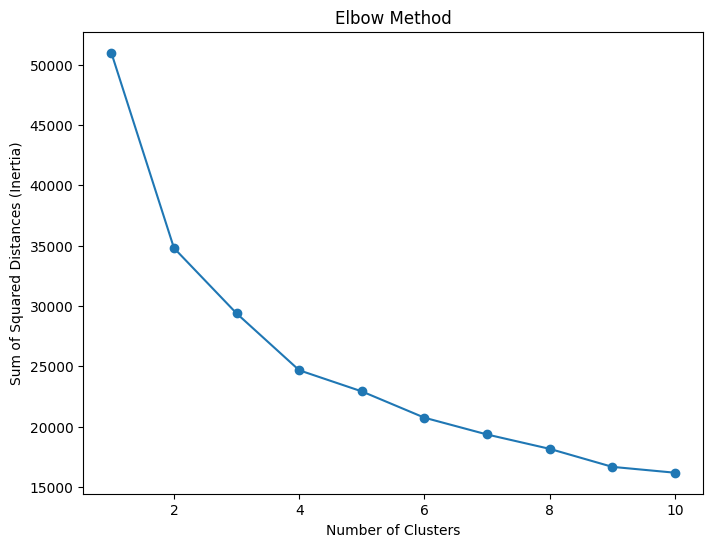

In [67]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()

<h4>From the elbow plot we can pick number of clusters at 3 as after 4 there's a huge reduction in vaiation indicating optimal results at number of clusters = 3

<h3> 3.5 Perform K-means clustering 

In [68]:
# The elbow is at k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(feature_set_scaled)

In [69]:
# Analyzing clusters
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)
centroid_df = pd.DataFrame(centroids, columns=features)

In [70]:
print("Cluster centroids (after inverse scaling):")
print(centroid_df)

Cluster centroids (after inverse scaling):
         price  bedrooms  bathrooms  square_feet   latitude  longitude
0  1194.295329  1.154394   1.006928   658.163895  32.036383 -99.768873
1  1483.895901  2.294334   1.954399  1151.548135  37.617103 -91.608521
2  1182.262562  1.352802   1.007630   711.470403  41.446887 -90.730904


<h4> Here we can see 3 clusters
First Cluster (0) :The average price is $1,194.30.
Second Cluster (1) : The average price is higher at $1,483.90.
Third Cluster (2) : The average price is $1,182.26

1. Price Analysis:
Cluster 1 seems to represent higher-priced apartments compared to Clusters 0 and 2, which have relatively similar average prices.

2. Bedrooms Analysis:
Cluster 1 has apartments with more bedrooms (around 2), which makes sense as it also has the highest price. Clusters 0 and 2, with fewer bedrooms (around 1), correspond to lower-priced homes.

3. Bathrooms Analysis:
Cluster 1, with its higher price and more bedrooms, also has close to 2 bathrooms, reflecting larger apartments or houses. Clusters 0 and 2, which are lower in price and bedroom count, have around 1 bathroom.

4. Square Feet Analysis
Cluster 1 has significantly larger homes in terms of square footage, which is consistent with the higher price, more bedrooms, and bathrooms. Clusters 0 and 2 have smaller homes.

5. Geographically (Lattitude and Longtitude)
Cluster 0: Geographically, this cluster might represent homes located more in the southern U.S., as indicated by the lower latitude (around 32 degrees).
Cluster 1: This cluster appears to correspond to more central areas in the U.S., as the latitude of 37.62 is further north than Cluster 0 but still central.
Cluster 2: This cluster has the highest latitude (41.45), which may represent homes in more northern regions compared to the other clusters.

Over all Cluster 1 contains more expensive, larger homes with more bedrooms and bathrooms, likely located in central regions, where as Cluster 0 and 2 contain smaller and similarly priced homes, but their geographical locations differ, with Cluster 0 homes located further south and Cluster 2 homes further north.

This analysis suggests that geographical location, price, and home size are correlated, with Cluster 1 representing higher-end, larger properties in central areas, while Clusters 0 and 2 represent more affordable, smaller properties located in different regions.

<h3> 3.6 Plotting Price vs Square colour-coded by Clusters

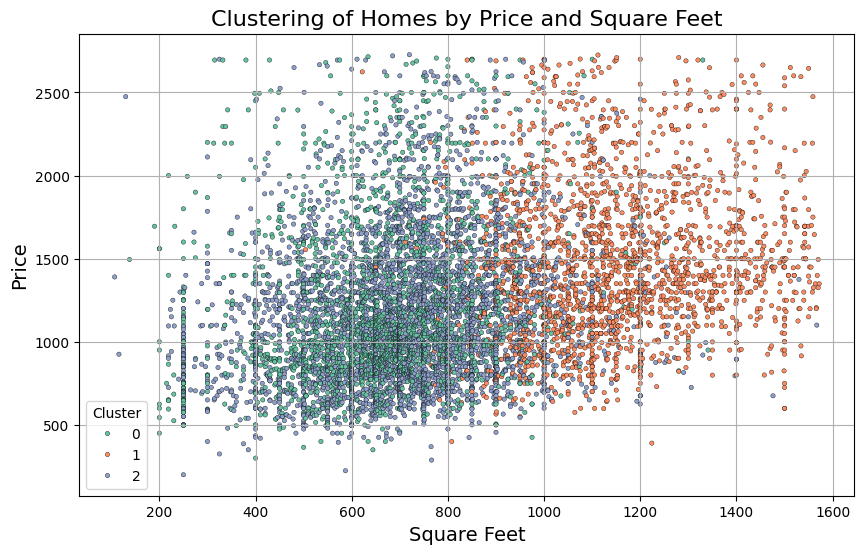

In [71]:
# Scatter plot of price vs square_feet, color-coded by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_clean['square_feet'], 
                y=df_clean['price'], 
                hue=df_clean['Cluster'], 
                palette='Set2', s=10, 
                edgecolor='black')

# Set plot title and labels
plt.title('Clustering of Homes by Price and Square Feet', fontsize=16)
plt.xlabel('Square Feet', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

<h3>3.7 Pair Plot

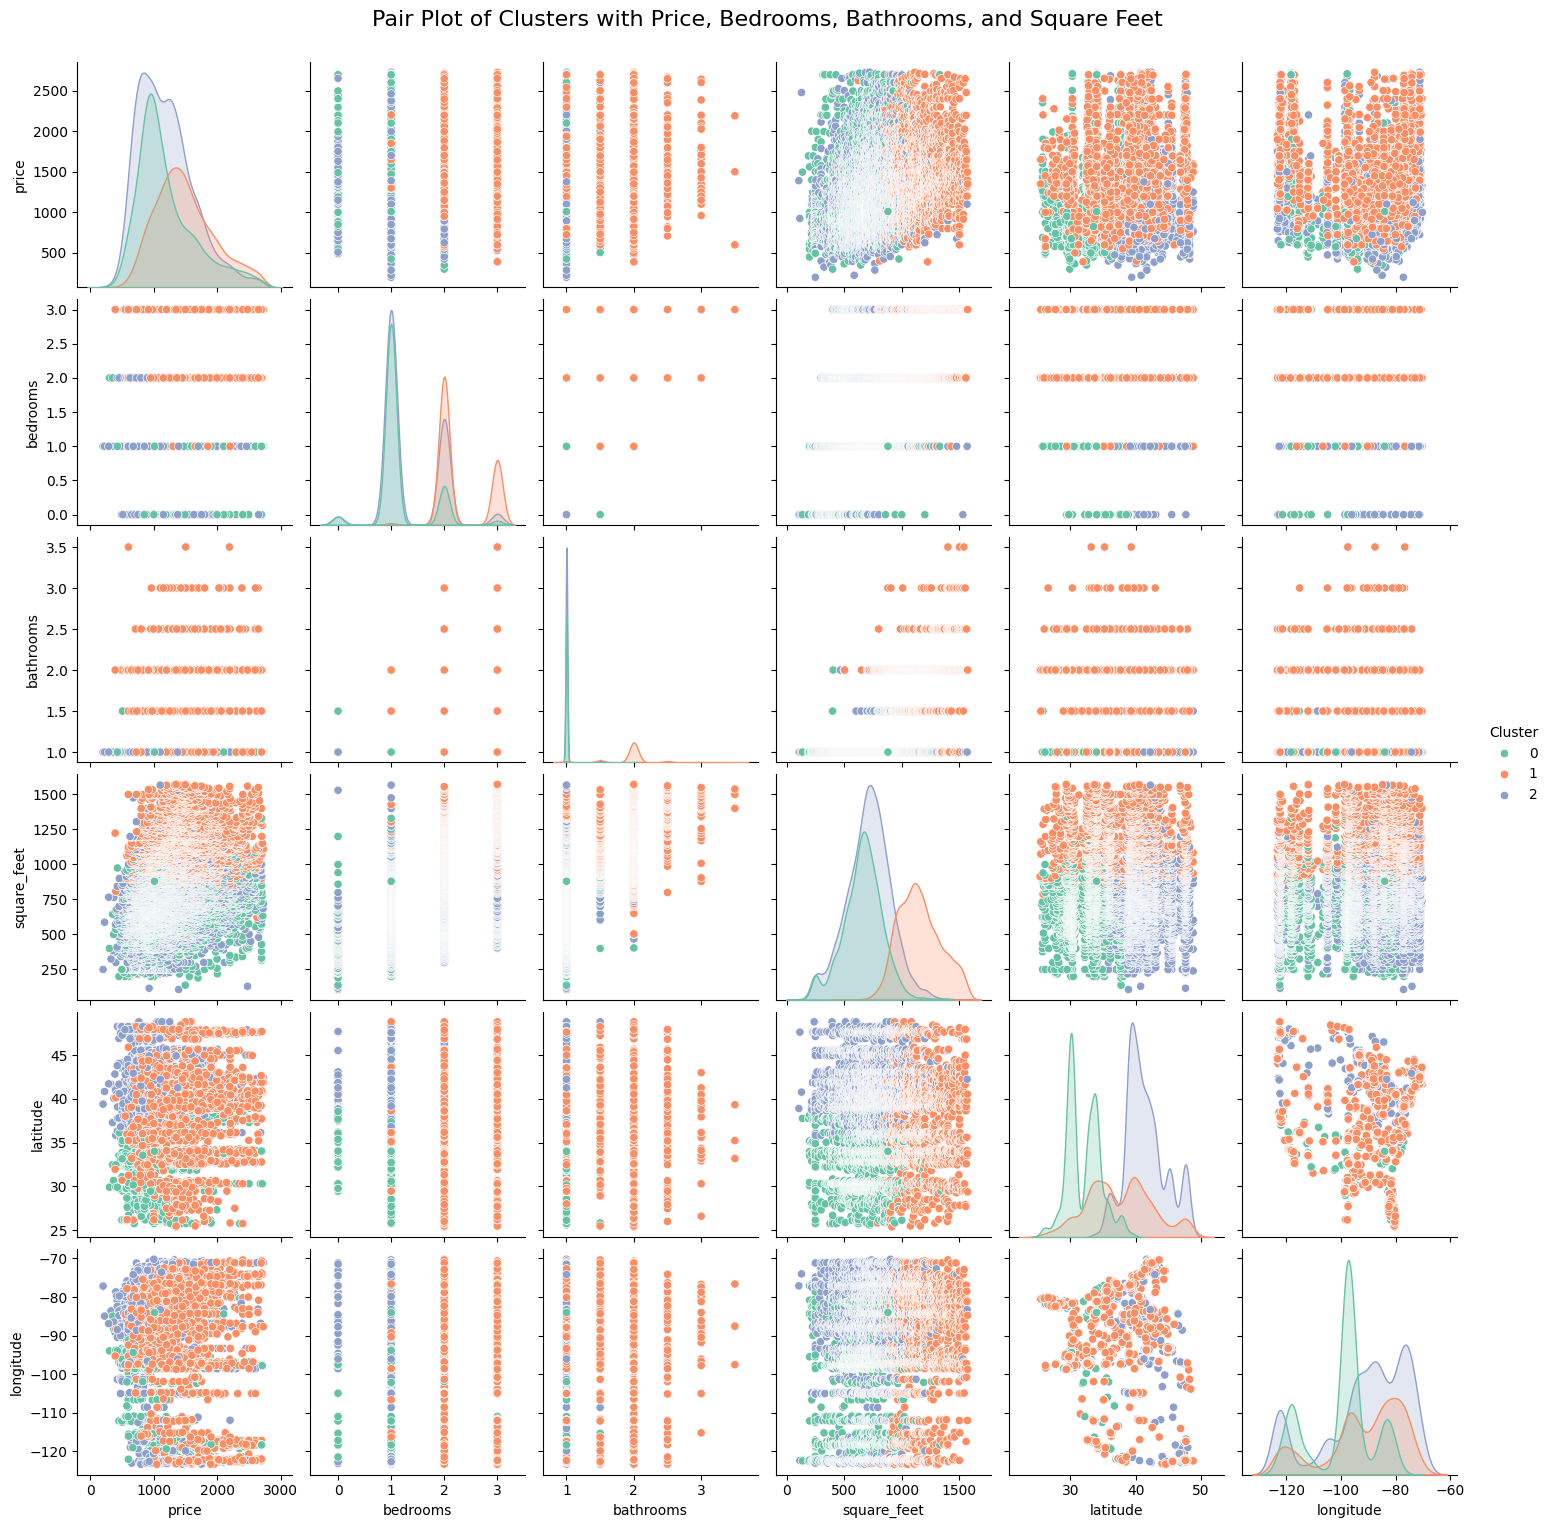

In [51]:
features_to_plot = ['price', 'bedrooms', 'bathrooms', 'square_feet', 'latitude', 'longitude', 'Cluster']

# Use Seaborn's pairplot to plot relationships between features with clusters as hue
sns.pairplot(df_clean[features_to_plot], hue='Cluster', palette='Set2', diag_kind='kde')

plt.suptitle('Pair Plot of Clusters with Price, Bedrooms, Bathrooms, and Square Feet', y=1.02, fontsize=16)
plt.show()


<h3> 3.8 Geographical Plot 

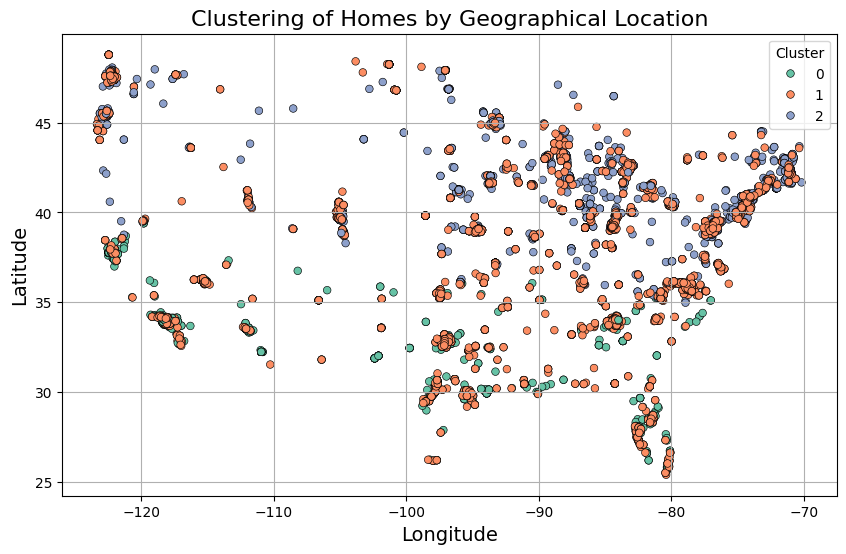

In [34]:
# 2. Geographical Plot (Latitude vs Longitude)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_clean['longitude'], y=df_clean['latitude'], hue=df_clean['Cluster'], palette='Set2', s=30, edgecolor='black')

# Set plot title and labels
plt.title('Clustering of Homes by Geographical Location', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.grid(True)
plt.show()

<h3>3.9 3D Plot For Price, Square Feet, Bedrooms

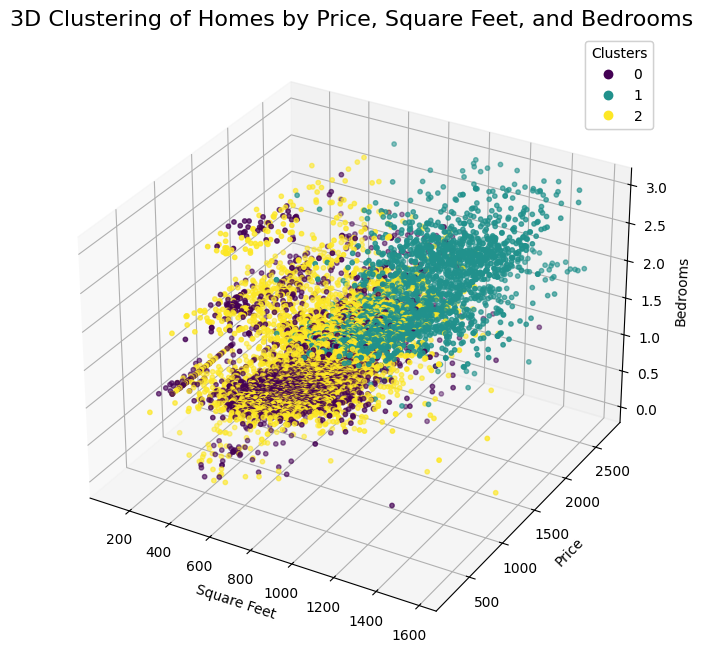

In [36]:
# 3D Plot (For Price, Square Feet, Bedrooms)
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coded clusters
scatter = ax.scatter(df_clean['square_feet'], df_clean['price'], df_clean['bedrooms'], c=df_clean['Cluster'], cmap='viridis', s=10)

# Add axis labels
ax.set_xlabel('Square Feet')
ax.set_ylabel('Price')
ax.set_zlabel('Bedrooms')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.title('3D Clustering of Homes by Price, Square Feet, and Bedrooms', fontsize=16)
plt.show()